# Customer Segmentation Project - Part 3 [Feature Engineering]

**A Classification & Clustering Model**

Creating choices of 2 new dataset for modeling, beside the original dataset.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Feature Engineering 1

Mengelompokan data numerik menjadi kategorikal dengan binning menjadi beberapa kategori.

In [3]:
df01_raw = pd.read_csv('dataset/output_p1.csv')
df01 = df01_raw.copy()
df01.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


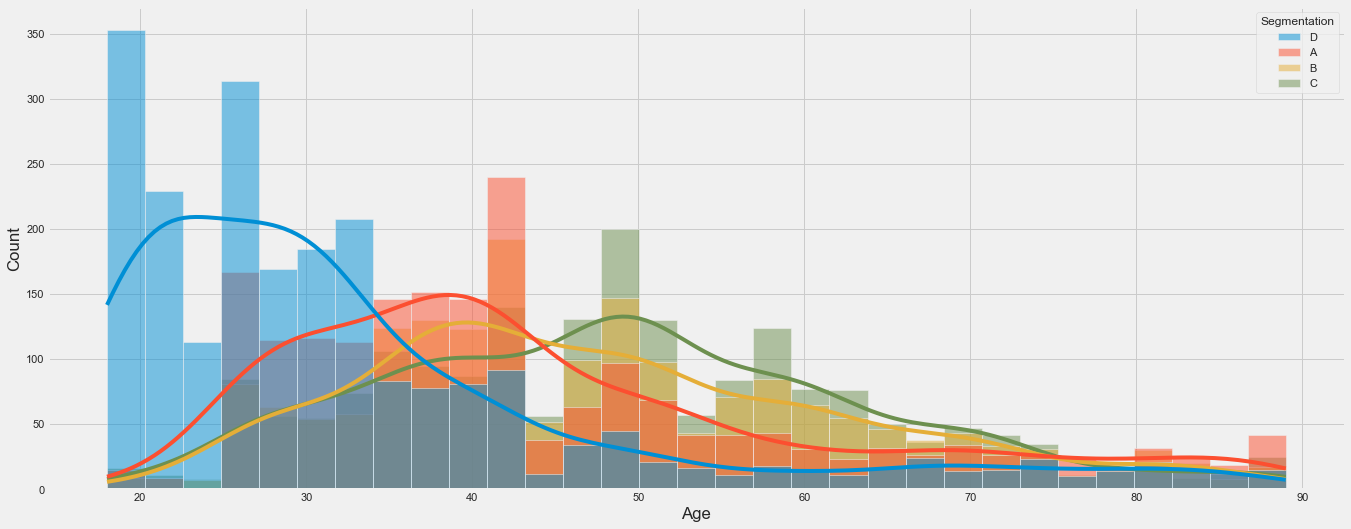

In [4]:
plt.figsize=((10,10))
sns.histplot(data=df01, x='Age', hue='Segmentation', kde=True)
warnings.filterwarnings("ignore")

Dapat dilihat bahwa segment D memiliki rentan usia yang cenderung lebih muda (17-30an). Apabila nilai numerik usia dapat dikelompokan menjadi kategori, hal itu mungkin dapat lebih membantu model dalam menentukan segmentasi seseorang.

Itulah asal mula upaya untuk membuat dataset yang data numerical nya dikelompokan menjadi categorical

### Age (Categorical)

In [5]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df01['Age'].quantile(quantile_list)
quantiles

0.00    18.0
0.25    30.0
0.50    40.0
0.75    53.0
1.00    89.0
Name: Age, dtype: float64

Pengelompokkan akan dilakukan menjadi 4 dengan quartil dari distribusi tersebut.

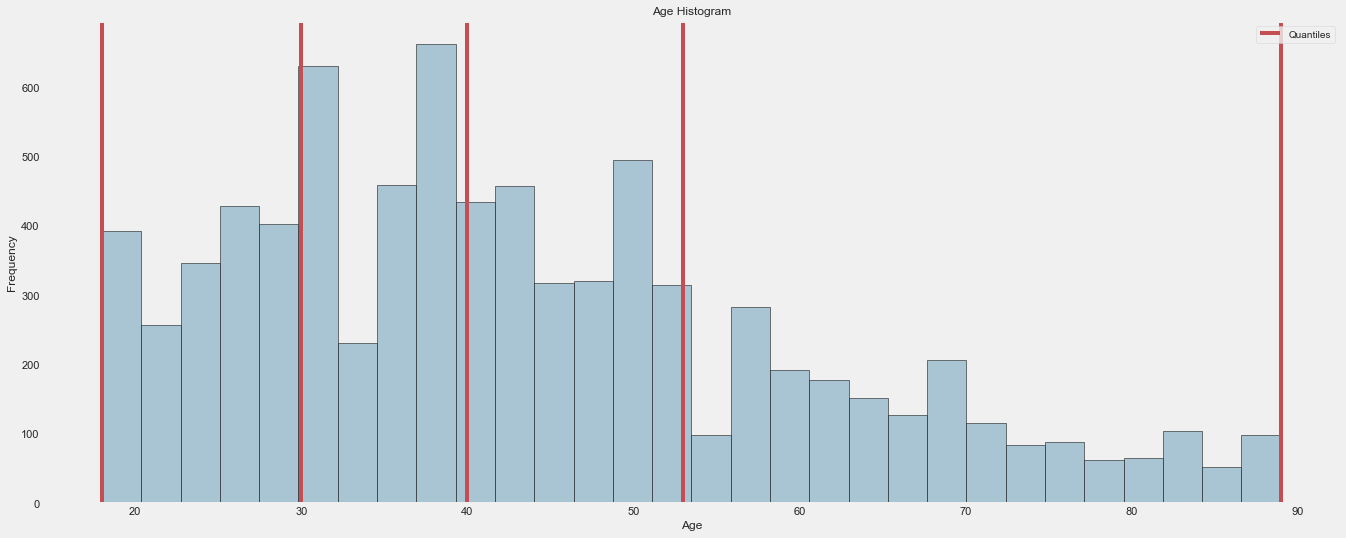

In [6]:
fig, ax = plt.subplots()
df01['Age'].hist(bins=30, color='#A9C5D3', edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

plt.show()

In [7]:
df01['Age_Group'] = pd.cut(df01['Age'],bins=[18.0,30.0,40.0,53.0,89.0],\
                                   labels=['Young','Young Adult','Adult','Oldies'])

df01['Age_Group'].head(3)

0          Young
1    Young Adult
2         Oldies
Name: Age_Group, dtype: category
Categories (4, object): ['Young' < 'Young Adult' < 'Adult' < 'Oldies']

### Work Experience (Categorical)

In [8]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df01['Work_Experience'].quantile(quantile_list)
quantiles

0.00     0.0
0.25     0.0
0.50     1.0
0.75     4.0
1.00    14.0
Name: Work_Experience, dtype: float64

In [9]:
def cat_we(df):
    if(df['Work_Experience']==0):
        return 'A'
    if(df['Work_Experience']>0)and(df['Work_Experience']<=1):
        return 'B'
    if(df['Work_Experience']>1)and(df['Work_Experience']<=4):
        return 'C'
    if(df['Work_Experience']>4):
        return 'D'

df01['WE_group']=df01.apply(cat_we,axis=1)
df01['WE_group'].head(3)

0    B
1    B
2    B
Name: WE_group, dtype: object

### Family Size (Categorical)

Pada variabel ini diputuskan untuk mengelompokkan family berdasarkan pemahaman yang lebih relevan bagi bisnis. Mengelompokkan data menjadi 3 kategori: 
- "Small" untuk keluarga dengan mobil ukuran kecil [1-3] 
- "Medium" untuk keluarga dengan mobil ukuran menengah [4-6]
- "Large" untuk keluarga dengan mobil ukuran besar [>6] 

In [10]:
def cat_fam(df):
    if(df['Family_Size']>=1)and(df['Family_Size']<=3):
        return 'Small Family'
    if(df['Family_Size']>=4)and(df['Family_Size']<=6):
        return 'Medium Family'
    else:
        return 'Large Family'

df01['Fam_group']=df01.apply(cat_fam,axis=1)
df01['Fam_group'].head(3)

0    Medium Family
1     Small Family
2     Small Family
Name: Fam_group, dtype: object

### Finalized

**Drop previous variable**

In [11]:
df01.drop(['Family_Size', 'Work_Experience', 'Age'], axis=1, inplace=True)

df01.head(3)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation,Age_Group,WE_group,Fam_group
0,Male,No,No,Healthcare,Low,Cat_4,D,Young,B,Medium Family
1,Female,Yes,Yes,Engineer,Average,Cat_4,A,Young Adult,B,Small Family
2,Female,Yes,Yes,Engineer,Low,Cat_6,B,Oldies,B,Small Family


**Processing**

In [12]:
#Seperate the Target
y = df01['Segmentation']
X_raw = df01.drop('Segmentation', axis=1)

In [13]:
for col in X_raw:
    X_raw = pd.get_dummies(X_raw, columns=[col], prefix=[col])
X_raw.head(3)

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Age_Group_Young Adult,Age_Group_Adult,Age_Group_Oldies,WE_group_A,WE_group_B,WE_group_C,WE_group_D,Fam_group_Large Family,Fam_group_Medium Family,Fam_group_Small Family
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [14]:
df01_finished = pd.concat([X_raw, y], axis=1)
df01_finished.head(3)

,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Age_Group_Adult,Age_Group_Oldies,WE_group_A,WE_group_B,WE_group_C,WE_group_D,Fam_group_Large Family,Fam_group_Medium Family,Fam_group_Small Family,Segmentation
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,D
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,A
2,1,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,B


**Export CSV**

In [15]:
df01_finished.to_csv('dataset_fe1.csv', index=False)

## Feature Engineering 2

Menciptakan fitur baru yang merupakan persona dari beberapa customer yang dominan pada segment D.

Dataset original yang sudah di proses

Namun tetap butuh mengambil beberapa fitur yang masih raw sebelum di process dari dataset sebelumnya

In [16]:
df_dummy = pd.read_csv('dataset/output_p1.csv')
df_dummy.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [17]:
def mapping_age(df):
    #Small
    if (df['Age'] <= 35):
        return 'Young_Adult'

    #Medium
    elif(df['Age'] > 35) and (df['Age'] <= 55):
        return 'Adult'

    #High
    else:
        return 'Oldies'

    
df_dummy['Age_Group'] = df_dummy.apply(lambda x: mapping_age(x), axis=1)

df_dummy.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Young_Adult
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Adult
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,Oldies


Menciptakan suatu variabel dummy untuk membaca kombinasi 3 variabel (Age, Profession, Spending Score)

In [18]:
df_dummy['Age_Prof_Spending'] = df_dummy[['Age_Group', 'Profession', 'Spending_Score']].agg('-'.join, axis=1)
df_dummy['Age_Prof_Spending'].head(2)

0    Young_Adult-Healthcare-Low
1        Adult-Engineer-Average
Name: Age_Prof_Spending, dtype: object

### Young Adult - Healthcare Job - Low Spending Score

In [19]:
df_check = df_dummy[df_dummy['Age_Prof_Spending'] == "Young_Adult-Healthcare-Low"]
df_check['Segmentation'].value_counts()

D    891
C    125
B     75
A     65
Name: Segmentation, dtype: int64

Dapat dilihat bahwa sebagian besar persona ini masuk pada segment D. Dengan dibuatnya variabel tersebut, model akan terbantu, jika seorang customer TRUE pada variabel ini maka most likely dia masuk pada segment D.

In [20]:
def youngHealthLow(df):
    if (df['Age_Prof_Spending'] == "Young_Adult-Healthcare-Low"):
        return 1
    else:
        return 0

df_dummy['Young_Healthcare_Low'] = df_dummy.apply(lambda x: youngHealthLow(x), axis=1)
df_dummy.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group,Age_Prof_Spending,Young_Healthcare_Low
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Young_Adult,Young_Adult-Healthcare-Low,1
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Adult,Adult-Engineer-Average,0


### Young Adult - Doctor Job - Low Spending Score

In [21]:
df_check = df_dummy[df_dummy['Age_Prof_Spending'] == "Young_Adult-Doctor-Low"]
df_check['Segmentation'].value_counts()

D    156
A     76
C     47
B     33
Name: Segmentation, dtype: int64

In [22]:
def youngDocLow(df):
    if (df['Age_Prof_Spending'] == "Young_Adult-Doctor-Low"):
        return 1
    else:
        return 0

df_dummy['Young_Doctor_Low'] = df_dummy.apply(lambda x: youngDocLow(x), axis=1)
df_dummy.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group,Age_Prof_Spending,Young_Healthcare_Low,Young_Doctor_Low
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Young_Adult,Young_Adult-Healthcare-Low,1,0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Adult,Adult-Engineer-Average,0,0


### Young Adult - Entertainment Job - Low Spending Score

In [23]:
df_check = df_dummy[df_dummy['Age_Prof_Spending'] == "Young_Adult-Entertainment-Low"]
df_check['Segmentation'].value_counts()

D    104
A     77
C     27
B     27
Name: Segmentation, dtype: int64

In [24]:
def youngEntertainLow(df):
    if (df['Age_Prof_Spending'] == "Young_Adult-Entertainment-Low"):
        return 1
    else:
        return 0

df_dummy['Young_Entertainment_Low'] = df_dummy.apply(lambda x: youngEntertainLow(x), axis=1)
df_dummy.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Group,Age_Prof_Spending,Young_Healthcare_Low,Young_Doctor_Low,Young_Entertainment_Low
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,Young_Adult,Young_Adult-Healthcare-Low,1,0,0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,Adult,Adult-Engineer-Average,0,0,0


### Finalized

Memasukkan 3 persona baru itu pada dataset utama (original yang sudah di process)

In [25]:
add_feat = df_dummy[['Young_Healthcare_Low', 'Young_Doctor_Low', 'Young_Entertainment_Low']]
add_feat.head(2)

,Young_Healthcare_Low,Young_Doctor_Low,Young_Entertainment_Low
0,1,0,0
1,0,0,0


In [26]:
df02_raw = pd.read_csv('dataset/output_p2.csv')
df02_finished = df02_raw.copy()
df02_finished.head()

,Age,Work_Experience,Family_Size,Spending_Score,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,-1.569557,0.019322,0.876402,1,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,D
1,-0.163683,0.019322,0.286154,2,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,A
2,1.316412,0.019322,-1.547326,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,B
3,1.316412,-1.176904,-0.474809,3,0,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,B
4,-0.030541,0.019322,1.766423,3,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,A


In [27]:
df02_finished = pd.concat([df02_finished, add_feat], axis=1)
df02_finished.head(3)

,Age,Work_Experience,Family_Size,Spending_Score,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation,Young_Healthcare_Low,Young_Doctor_Low,Young_Entertainment_Low
0,-1.569557,0.019322,0.876402,1,0,1,1,0,1,0,...,0,0,1,0,0,0,D,1,0,0
1,-0.163683,0.019322,0.286154,2,1,0,0,1,0,1,...,0,0,1,0,0,0,A,0,0,0
2,1.316412,0.019322,-1.547326,1,1,0,0,1,0,1,...,0,0,0,0,1,0,B,0,0,0


**Export CSV**

In [28]:
df02_finished.to_csv('dataset_fe2.csv', index=False)

In [31]:
import os

os.system('jupyter nbconvert --to html Part_3_Feature_Engineering.ipynb')

0